In [1]:
# import thr libraries
import numpy as np #for math operations
import pandas as pd #for manipulating dataset
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette("BrBG")

In [107]:
# read the dataset
data_su= pd.read_csv('suicides.csv')
data_su.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
#check the data

data_su.shape

(237519, 7)

In [5]:
#types of data
data_su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [6]:
#missing value in data
data_su.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

##### How many people committed suicide from 2001-12?

In [7]:
data_su.groupby('Year')['Total'].sum()

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

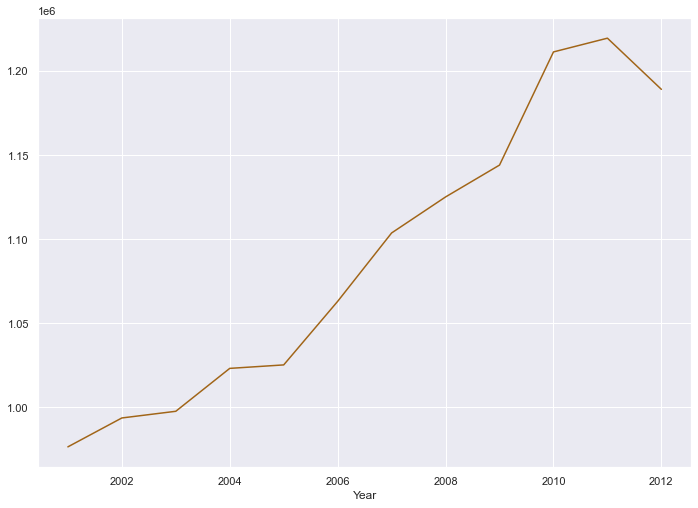

In [9]:
# plot the data

data_su.groupby('Year')['Total'].sum().plot.line()
plt.show()

##### How many people committed suicide from from different states?

In [11]:
data_su['State'].value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Odisha               6791
Rajasthan            6791
Andhra Pradesh       6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Gujarat              6786
Assam                6786
Tamil Nadu           6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (Uts)           312
Total (All India)     312
Total (States)        312
Name: State,

In [17]:
data_su['State']=data_su[-((data_su['State'] == 'Total (Uts)') | (data_su['State'] == 'Total (All India)') | (data_su['State'] == 'Total (States)'))]

In [18]:
data_su['State'].value_counts()

Karnataka            6792
Maharashtra          6792
Madhya Pradesh       6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Haryana              6790
Bihar                6790
Chhattisgarh         6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Assam                6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

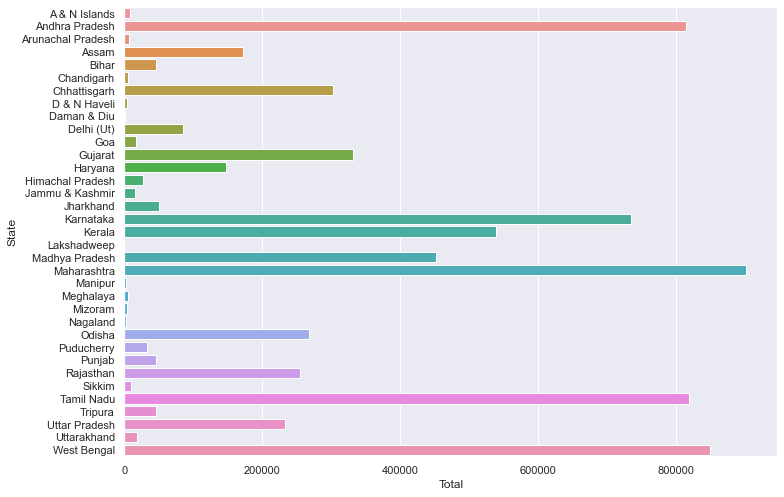

In [25]:
#statewise death count
states = data_su.groupby('State')['Total'].sum().reset_index()
sns.barplot(y='State', x='Total', data=states,edgecolor = 'w')
plt.show()

Above data clearly shows, Top states in commiting suicides are:
- Maharashtra
- West Bengal
- Tamil Nadu
- Andhra Pradesh

# Let’s create a word cloud

Words with larger font size are the States which have higher number of suicide cases.

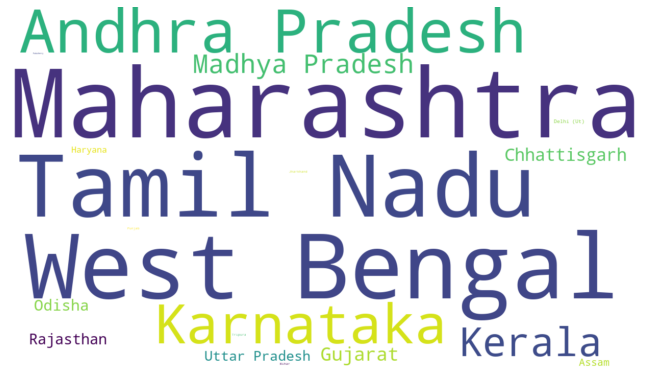

In [36]:
from wordcloud import WordCloud
count = {}
for x in states["State"].values:
    count[x]=int(states[states["State"]==x].Total)

wordcloud = WordCloud(width=1280,height=720,relative_scaling=1,background_color='white',normalize_plurals=False).generate_from_frequencies(count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

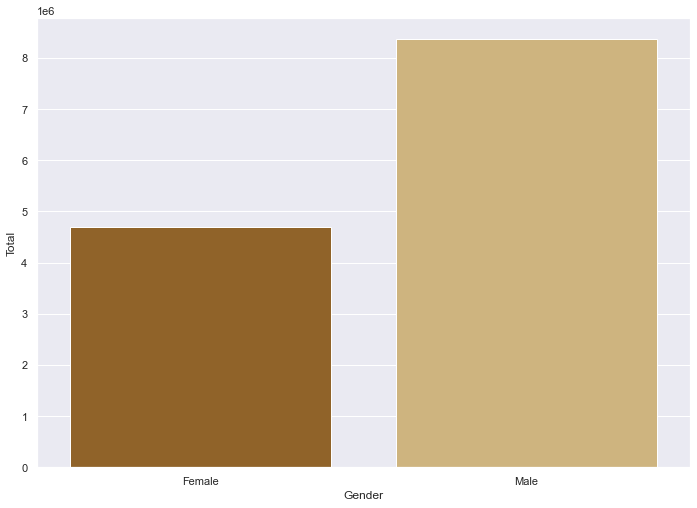

In [42]:
# gender wise suicide 
gender=data_su.groupby('Gender')['Total'].sum().reset_index()
sns.barplot(x='Gender', y='Total', data=gender)
plt.show()

Men commit more suicide than women

###### Male & female suicide cases trend over the years


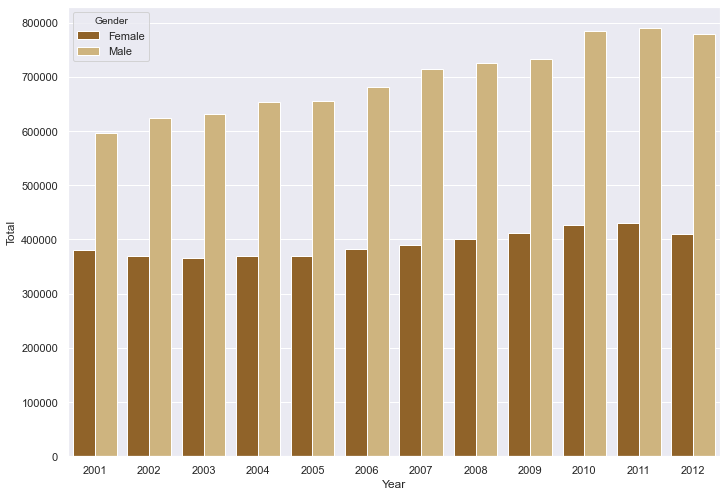

In [53]:
year_g = data_su.groupby(['Year','Gender'])['Total'].sum().reset_index()
sns.barplot(y = 'Total',x='Year', data=year_g, hue='Gender')
plt.show()

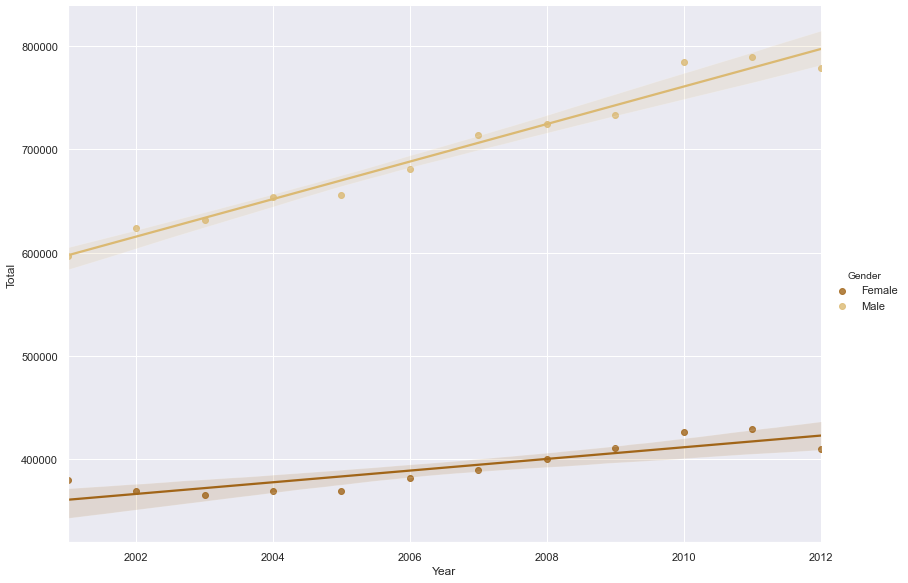

In [57]:
sns.lmplot(y = 'Total',x='Year', data=year_g, hue='Gender', height=8.27, aspect=11.7/8.27)
plt.show()

##### Number of cases bases on the reason they committed suicide

In [58]:
data_su.head(1)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [67]:
cause = data_su.groupby('Type_code')['Total'].sum().reset_index()


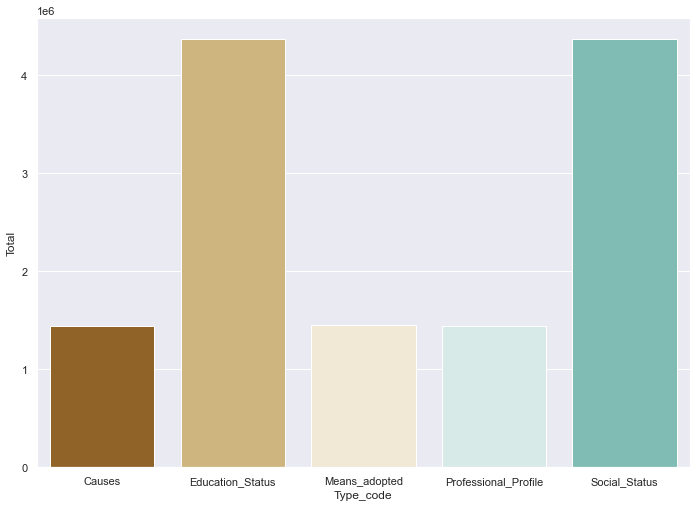

In [69]:
sns.barplot(x='Type_code', y='Total', data=cause)
plt.show()

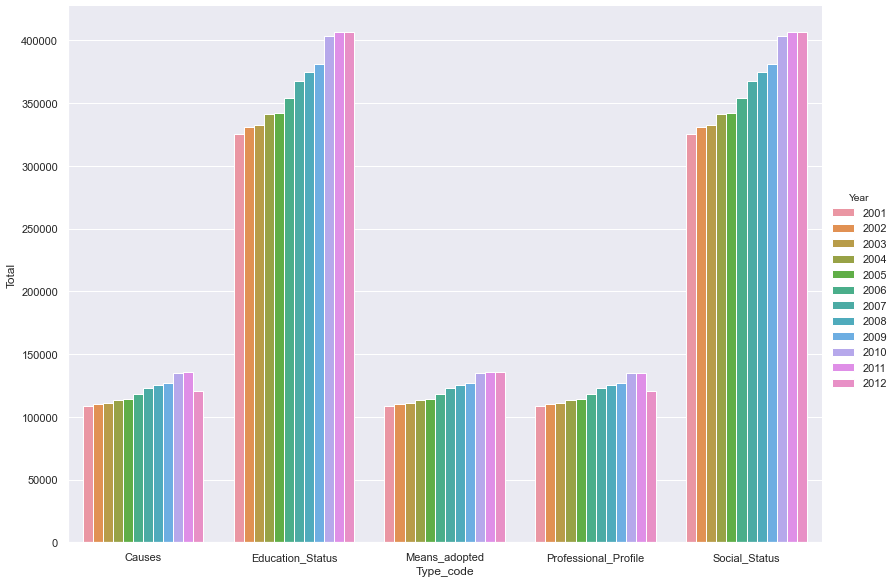

In [75]:
# yearwise cause of death
cause_y = data_su.groupby(['Year', 'Type_code'])['Total'].sum().reset_index()
sns.catplot(x='Type_code', y='Total', hue='Year', kind='bar', data=cause_y, height=8.27, aspect=11.7/8.27)
plt.show()

##### social status of the people who commit suicide

In [80]:
social_status_type = data_su[data_su['Type_code'] == 'Social_Status'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()

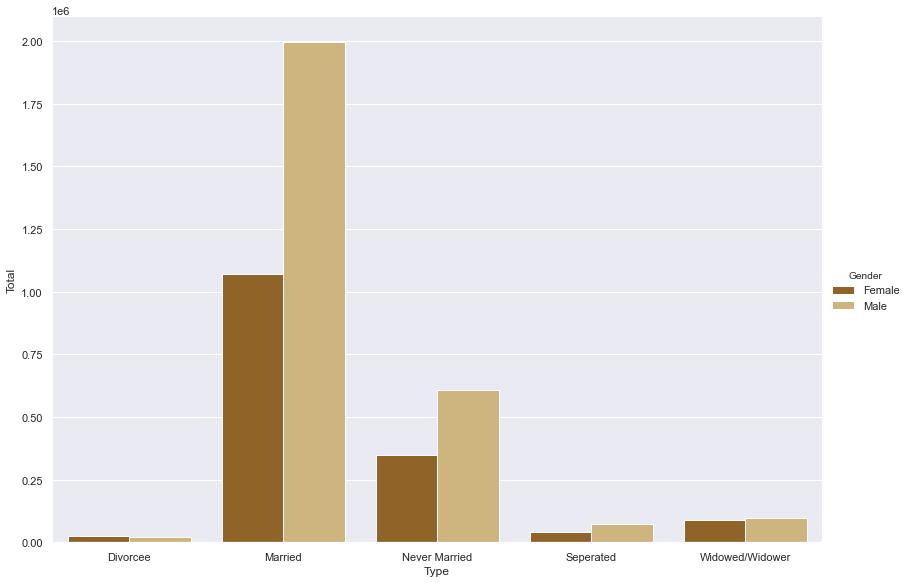

In [81]:
sns.catplot(x='Type', y='Total', hue='Gender', kind='bar', data=social_status_type, height=8.27, aspect=11.7/8.27)
plt.show()

Married men commit more suicide 

#### What was the education status of people who committed suicides?

In [84]:
education_status_type = data_su[data_su['Type_code'] == 'Education_Status'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()


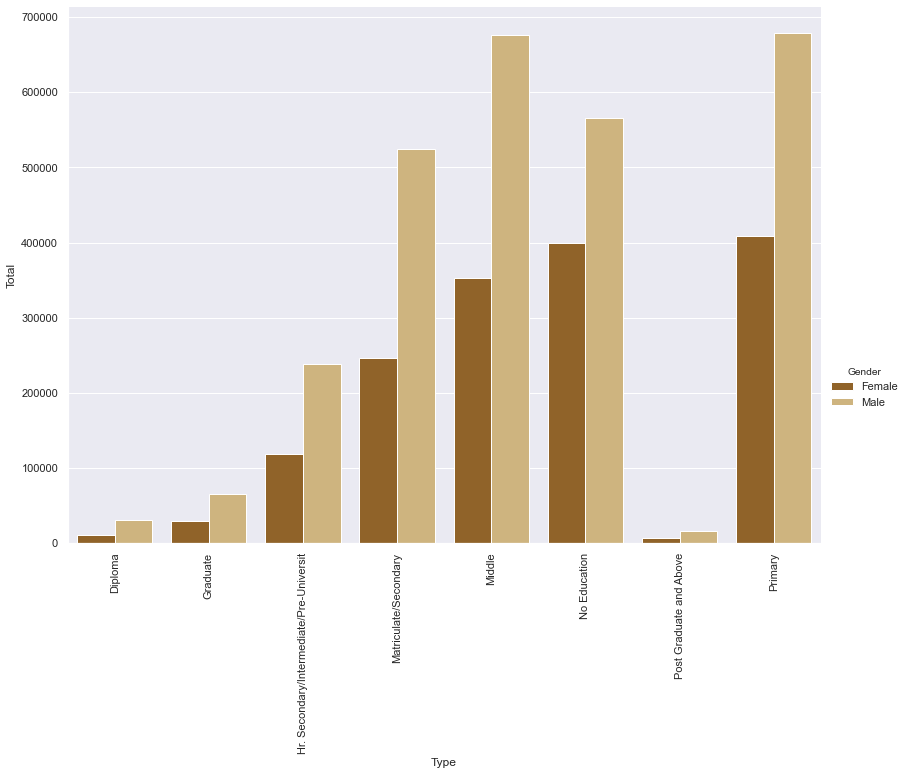

In [86]:
sns.catplot(x='Type', y='Total', hue='Gender', kind='bar', data=education_status_type, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

People with low education tend to commit more suicide. Diploma and Graduate commite less suicide

#### What was the profession of the people who committed suicides?

In [88]:
professional_status_type = data_su[data_su['Type_code'] == 'Professional_Profile'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()


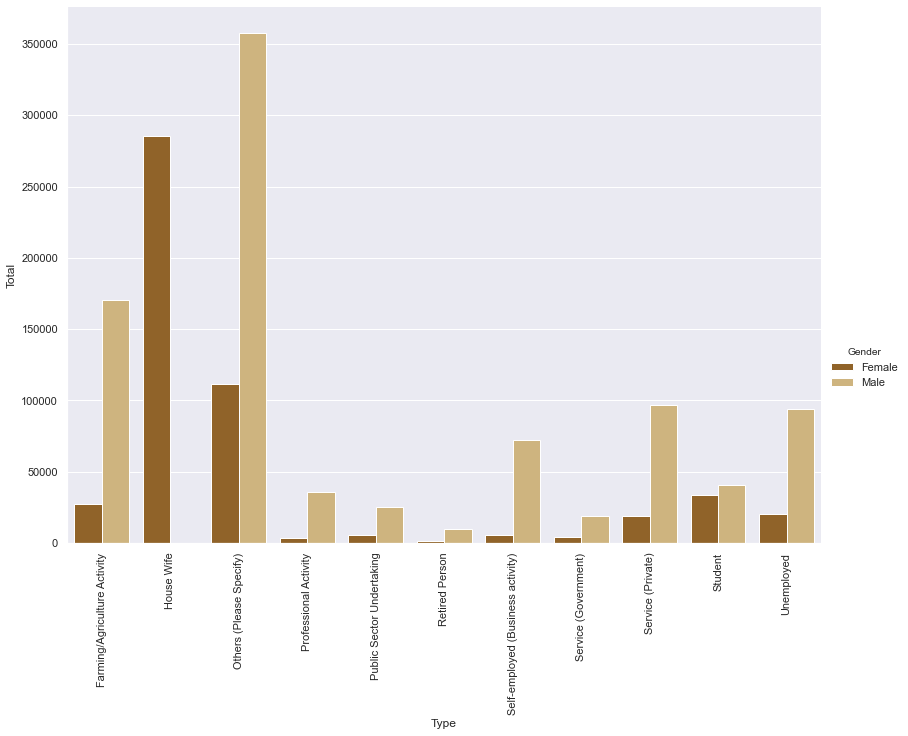

In [89]:
sns.catplot(x='Type', y='Total', hue='Gender', kind='bar', data=professional_status_type, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

Farmers and housewives tend to commit more suicide compared to others.

In [91]:
causes_status_type = data_su[data_su['Type_code'] == 'Causes'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()


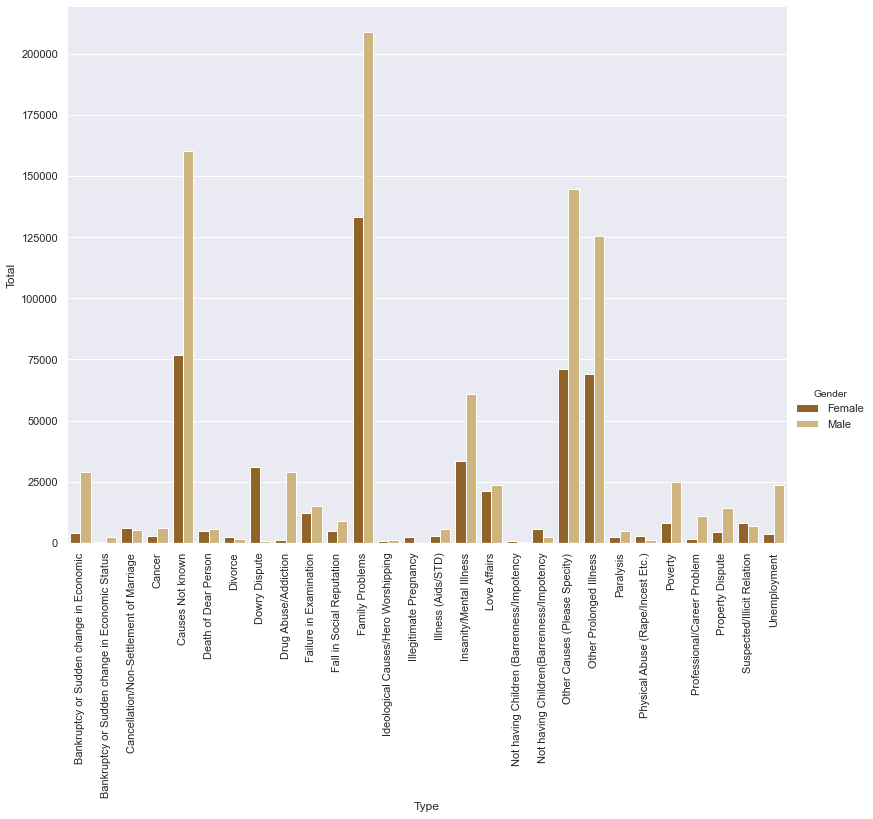

In [92]:
sns.catplot(x='Type', y='Total', hue='Gender', kind='bar', data=causes_status_type, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

Family problems tend to commit more suicide in Men

In [96]:
means_adopted_status_type = data_su[data_su['Type_code'] == 'Means_adopted'].groupby(['Type', 'Gender'])['Total'].sum().reset_index()


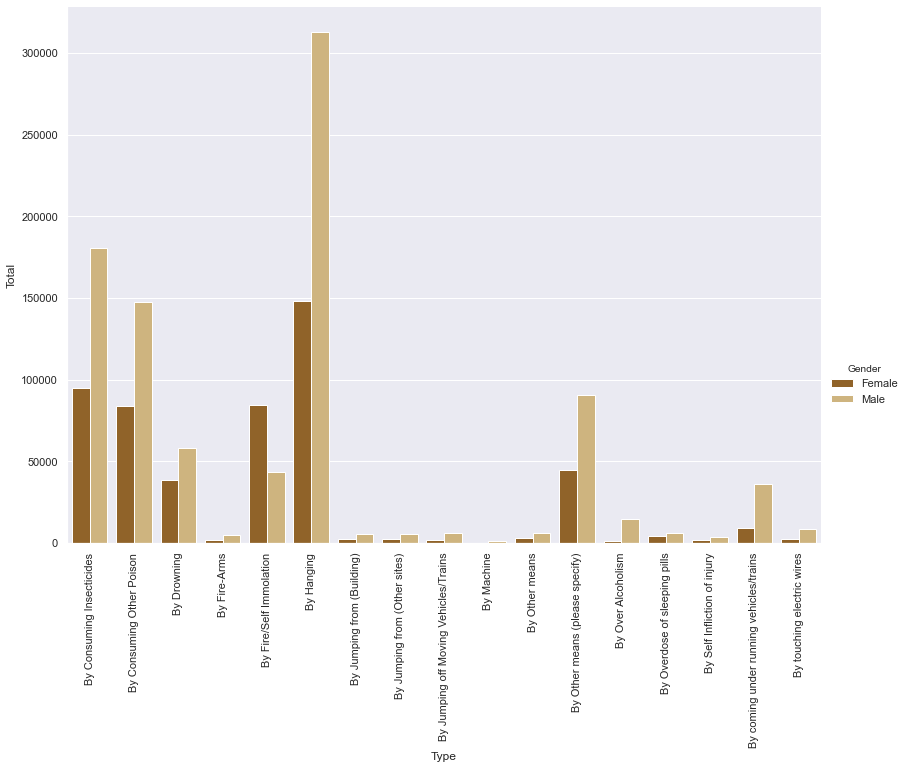

In [97]:
sns.catplot(x='Type', y='Total', hue='Gender', kind='bar', data=means_adopted_status_type, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

Hanging is most preffered way for suicide

# age group wise

In [108]:
data_su.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

In [110]:
age_group = data_su[-(data_su.Age_group == '0-100+')]

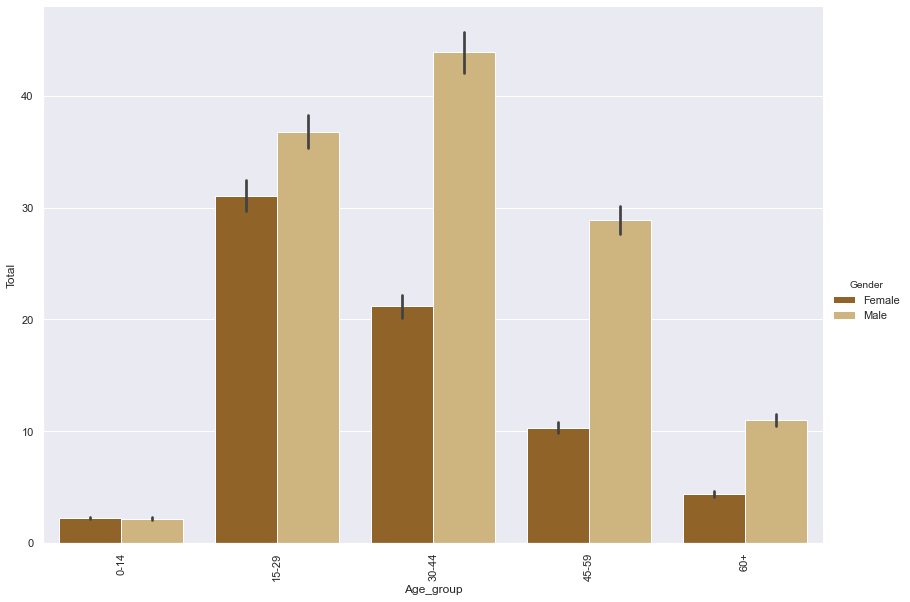

In [112]:
sns.catplot(x='Age_group', y='Total', hue='Gender', kind='bar', data=age_group, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.show()

15-29 & 30-44 tends to commit more suicide

In [113]:
age_group.groupby()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
